In [43]:
sigma_sn = lambda S : 0.215 + 0.374 * np.log(S/100)
def sn_delta(S,K,sigma_f,r,y,t,T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)      
    x_m = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) - sigma * np.sqrt(T-t) / 2
    return (960*np.exp(-r*(T-t))*norm.pdf(x_m)/(S*sigma*np.sqrt(T-t)))
def sn_gamma(S,K,sigma_f,r,y,t,T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)  
    x_p =  (np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) + sigma * np.sqrt(T-t) / 2
    return (-x_p*sn_delta(S,K,sigma_f,r,y,t,T,iv)/(S*sigma*np.sqrt(T-t)))
def structuredNoteVal(S,K,sigma_f,r,y,t,T,iv=False):
    if(iv==True):
        sigma = sigma_f(S,K)
    else:
        sigma = sigma_f(S,S)    
    x_m = ( np.log(S/K) + (r - y) * (T-t) ) / (sigma * np.sqrt(T-t)) - sigma * np.sqrt(T-t) / 2
    if(iv==True):
        vega = np.sqrt(T)*K*np.exp(-r*T)*norm.pdf(x_m)
        dsigma_dk = derivative(sigma_sn,S,dx=1e-06)
        return (10000*np.exp(-r*(T-t)) + 960*(np.exp(-r * (T - t)) * norm.cdf(x_m) + vega*dsigma_dk))
    else:
        return (10000*np.exp(-r*(T-t)) + 960*np.exp(-r * (T - t)) * norm.cdf(x_m))


In [3]:
K=100
r = 0.0045
y = 0.018
t = 0
T = 3



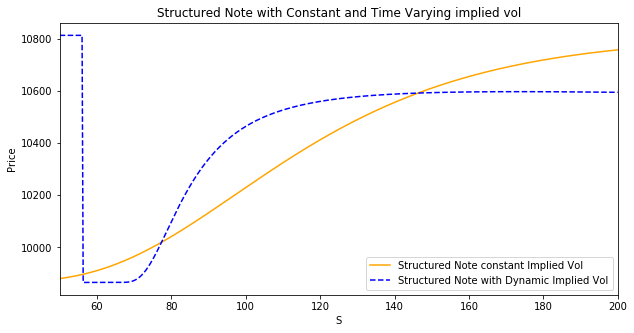

In [42]:
sn_list = []
sn_list_iv = []
S_list = np.linspace(50, 200, 500)
for S in S_list:
    sn_list.append(structuredNoteVal(S,K,sigma_f,r,y,t,T,iv=False))
    sn_list_iv.append(structuredNoteVal(S,K,sigma_f,r,y,t,T,iv=True))
plt.figure(figsize=(10,5))
plt.plot(S_list, sn_list, color='orange', label="Structured Note constant Implied Vol");
plt.plot(S_list, sn_list_iv, color="blue", linestyle="dashed", label="Structured Note with Dynamic Implied Vol");
plt.xlabel("S")
plt.ylabel("Price")
plt.xlim(50, 200)
plt.title("Structured Note with Constant and Time Varying implied vol")
plt.legend()

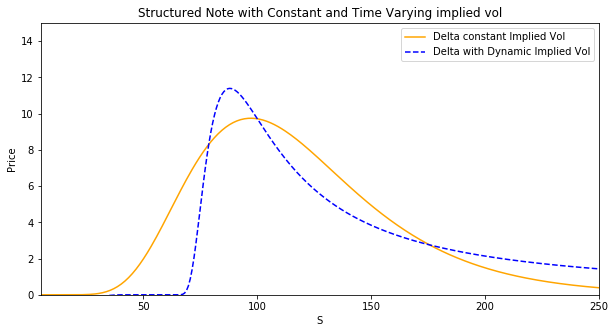

In [39]:
sn_delta_list = []
sn_delta_list_iv = []
S_list = np.linspace(5, 250, 300)
for S in S_list:
    sn_delta_list.append(sn_delta(S,K,sigma_f,r,y,t,T,iv=False))
    sn_delta_list_iv.append(sn_delta(S,K,sigma_f,r,y,t,T,iv=True))
plt.figure(figsize=(10,5))
plt.plot(S_list, sn_delta_list, color='orange', label="Delta constant Implied Vol");
plt.plot(S_list, sn_delta_list_iv, color="blue", linestyle="dashed", label="Delta with Dynamic Implied Vol");
plt.xlabel("S")
plt.ylabel("Price")
plt.xlim(5, 250)
plt.ylim(0, 15)
plt.title("Structured Note with Constant and Time Varying implied vol")
plt.legend()

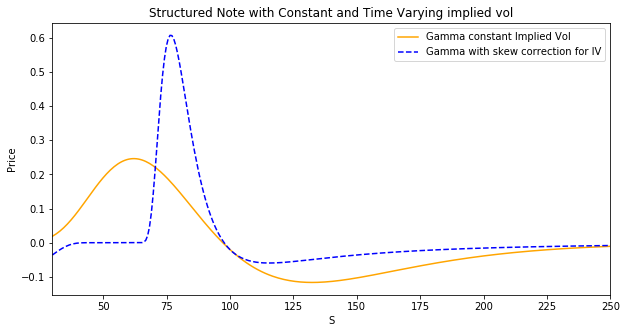

In [48]:
sn_gamma_list = []
sn_gamma_list_iv = []
S_list = np.linspace(30, 250, 300)
for S in S_list:
    sn_gamma_list.append(sn_gamma(S,K,sigma_f,r,y,t,T,iv=False))
    sn_gamma_list_iv.append(sn_gamma(S,K,sigma_f,r,y,t,T,iv=True))
plt.figure(figsize=(10,5))
plt.plot(S_list, sn_gamma_list, color='orange', label="Gamma constant Implied Vol");
plt.plot(S_list, sn_gamma_list_iv, color="blue", linestyle="dashed", label="Gamma with skew correction for IV");
plt.xlabel("S")
plt.ylabel("Price")
plt.xlim(30, 250)
plt.title("Structured Note with Constant and Time Varying implied vol")
plt.legend()

In [ ]:
## Gamma is slightly wrong as we need to account for dsigma/ds

In [11]:
def dollar_gamma(St, K, t, T, r, sigma):
    ''' Returns European call option dollar gamma. '''
    d1 = ((np.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t)) / sigma * np.sqrt(T- t))
    gamma = norm.pdf(d1) / (St * sigma * np.sqrt(T - t))
    return gamma * St ** 2

In [5]:
t = 0.0
T = 1.0
r = 0.01
sigma = 0.2

In [12]:
gammas = pd.DataFrame()
s_range = np.linspace(0.0001, 300, 300)
strike_range = range(25, 226, 25)
for K in strike_range:
    gammas['K=%d' % K] = dollar_gamma(s_range, K, t, T, r, sigma)

In [13]:
gammas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
K=25     300 non-null float64
K=50     300 non-null float64
K=75     300 non-null float64
K=100    300 non-null float64
K=125    300 non-null float64
K=150    300 non-null float64
K=175    300 non-null float64
K=200    300 non-null float64
K=225    300 non-null float64
dtypes: float64(9)
memory usage: 21.2 KB


Text(0, 0.5, 'Dollar Gamma')

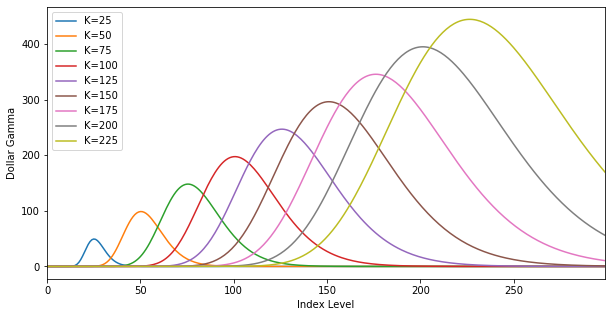

In [15]:
gammas.plot(figsize=(10, 5))
plt.xlabel('Index Level')
plt.ylabel('Dollar Gamma')

In [16]:
### Add dollar gamma of portfolios with weight as 1/K2
gammas_k2 = pd.DataFrame()
for K in strike_range:
    gammas_k2['K=%d' % K] = dollar_gamma(s_range, K, t, T, r,sigma) / K ** 2

In [17]:
gammas_k2['sum'] = gammas_k2.sum(axis=1)

Text(0, 0.5, '$Kˆ2$ weighted dollar gamma')

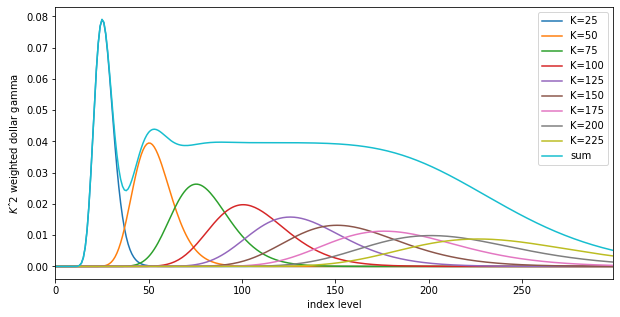

In [18]:
gammas_k2.plot(figsize=(10, 5))
plt.xlabel('index level')
plt.ylabel('$Kˆ2$ weighted dollar gamma')

We get constant dollar gamma between strikes 75 - 150. Now if we use a denser strike range, we get constant dollar gamma over a longer period

In [20]:
## Using a denser strike range
strike_range = range(10, 350, 5)
gammas_k2 = pd.DataFrame()
for K in strike_range:
    gammas_k2['K=%d' % K] = dollar_gamma(s_range, K, t, T, r,sigma) / K ** 2

In [21]:
gammas_k2 ['sum'] = gammas_k2.sum(axis=1)


Text(0, 0.5, '$Kˆ2$ weighted dollar gamma')

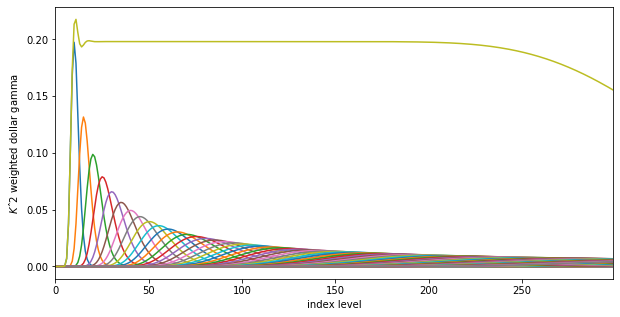

In [22]:
gammas_k2.plot(figsize=(10, 5), legend=False)
plt.xlabel('index level')
plt.ylabel('$Kˆ2$ weighted dollar gamma')


### CONC & CONP Delta

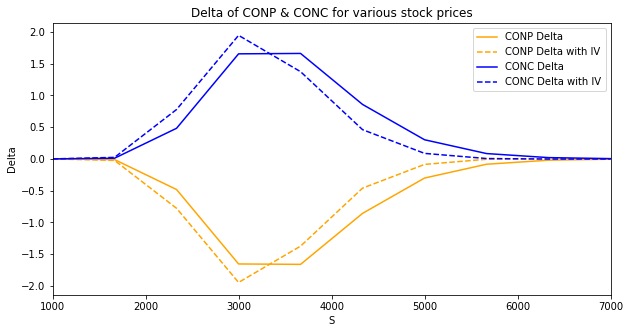

In [64]:
conp_delta_list = []
conp_delta_list_iv = [] 
conc_delta_list = []
conc_delta_list_iv = [] 
S_list = np.linspace(1000, 7000, 10)
for S in S_list:
    conp_delta_list.append(delta_CONP(S, 3200, sigma_f, r, y, t, T,False))
    conp_delta_list_iv.append(delta_CONP(S, 3200, sigma_f, r, y, t, T,True))
    conc_delta_list.append(delta_CONC(S, 3200, sigma_f, r, y, t, T,False))
    conc_delta_list_iv.append(delta_CONC(S, 3200, sigma_f, r, y, t, T,True))
plt.figure(figsize=(10,5))
plt.plot(S_list, conp_delta_list, color='orange', label="CONP Delta");
plt.plot(S_list, conp_delta_list_iv, color='orange', linestyle="dashed", label="CONP Delta with IV");
plt.plot(S_list, conc_delta_list, color="blue", label="CONC Delta");
plt.plot(S_list, conc_delta_list_iv, color="blue", linestyle="dashed", label="CONC Delta with IV");
plt.xlabel("S")
plt.ylabel("Delta")
plt.xlim(1000, 7000)
plt.title("Delta of CONP & CONC for various stock prices")
plt.legend()